# COMP SCI 760 - Machine Learning
## Homework 6 - Q1 Part (b)
- Name: Manas Trivedi
- ID: 9085825512

In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [2]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [3]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Generator

In [4]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [5]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [6]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [7]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [8]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [9]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [10]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [11]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [12]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [13]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

118it [00:08, 13.94it/s]                                                        


Epoch 1 of 100
Generator loss: 1.47335637, Discriminator loss: 0.87861037


118it [00:08, 13.86it/s]                                                        


Epoch 2 of 100
Generator loss: 2.29694247, Discriminator loss: 1.22012246


118it [00:08, 13.79it/s]                                                        


Epoch 3 of 100
Generator loss: 4.34063005, Discriminator loss: 0.46579129


118it [00:08, 13.84it/s]                                                        


Epoch 4 of 100
Generator loss: 5.39898920, Discriminator loss: 0.37014228


118it [00:08, 13.87it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


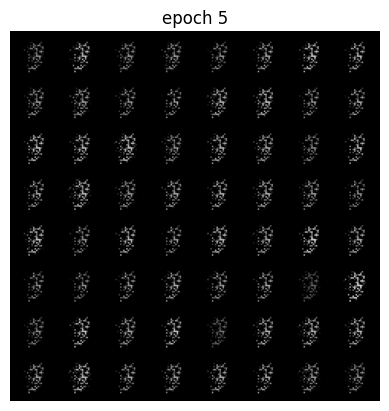

Epoch 5 of 100
Generator loss: 5.23869896, Discriminator loss: 0.42220473


118it [00:08, 13.61it/s]                                                        


Epoch 6 of 100
Generator loss: 4.82397795, Discriminator loss: 0.36597610


118it [00:08, 13.83it/s]                                                        


Epoch 7 of 100
Generator loss: 3.88546658, Discriminator loss: 0.55689299


118it [00:08, 13.73it/s]                                                        


Epoch 8 of 100
Generator loss: 4.24155855, Discriminator loss: 0.19793946


118it [00:08, 13.79it/s]                                                        


Epoch 9 of 100
Generator loss: 4.19239616, Discriminator loss: 0.13324459


118it [00:08, 13.82it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


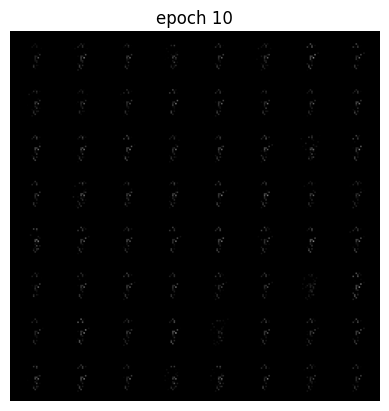

Epoch 10 of 100
Generator loss: 4.98486900, Discriminator loss: 0.08845737


118it [00:08, 13.71it/s]                                                        


Epoch 11 of 100
Generator loss: 5.47291899, Discriminator loss: 0.03443405


118it [00:08, 13.75it/s]                                                        


Epoch 12 of 100
Generator loss: 6.06096888, Discriminator loss: 0.02184243


118it [00:08, 13.68it/s]                                                        


Epoch 13 of 100
Generator loss: 7.46161366, Discriminator loss: 0.47676042


118it [00:08, 13.79it/s]                                                        


Epoch 14 of 100
Generator loss: 19.65350533, Discriminator loss: 0.69025815


118it [00:08, 13.87it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


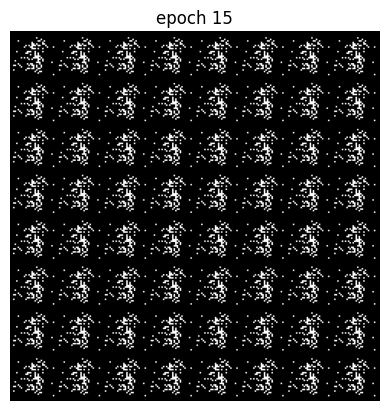

Epoch 15 of 100
Generator loss: 15.24464035, Discriminator loss: 0.01566990


118it [00:08, 13.78it/s]                                                        


Epoch 16 of 100
Generator loss: 13.70338058, Discriminator loss: 0.01735614


118it [00:08, 13.82it/s]                                                        


Epoch 17 of 100
Generator loss: 17.87311363, Discriminator loss: 0.00818897


118it [00:08, 13.81it/s]                                                        


Epoch 18 of 100
Generator loss: 42.88155746, Discriminator loss: 0.00276431


118it [00:08, 13.87it/s]                                                        


Epoch 19 of 100
Generator loss: 68.41893005, Discriminator loss: 0.00086452


118it [00:08, 13.88it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


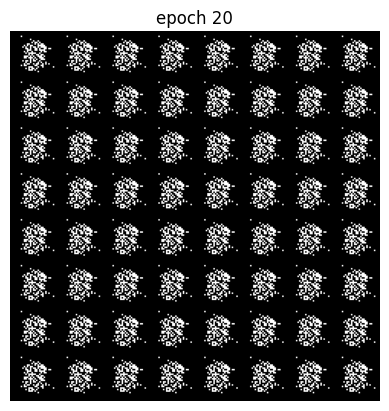

Epoch 20 of 100
Generator loss: 75.51177979, Discriminator loss: 0.00042600


118it [00:08, 13.81it/s]                                                        


Epoch 21 of 100
Generator loss: 78.93800354, Discriminator loss: 0.00030358


118it [00:08, 13.87it/s]                                                        


Epoch 22 of 100
Generator loss: 82.33702087, Discriminator loss: 0.00023031


118it [00:08, 13.84it/s]                                                        


Epoch 23 of 100
Generator loss: 83.49664307, Discriminator loss: 0.00016358


118it [00:08, 13.86it/s]                                                        


Epoch 24 of 100
Generator loss: 83.95535278, Discriminator loss: 0.00015070


118it [00:08, 13.77it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


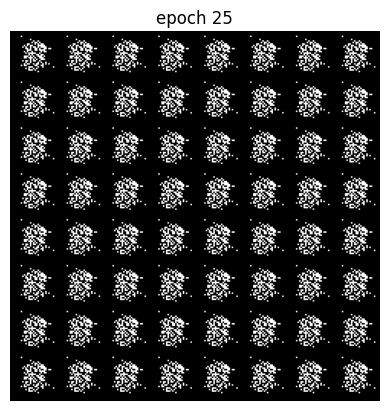

Epoch 25 of 100
Generator loss: 86.19337463, Discriminator loss: 0.00013973


118it [00:08, 13.82it/s]                                                        


Epoch 26 of 100
Generator loss: 90.08210754, Discriminator loss: 0.00013387


118it [00:08, 13.84it/s]                                                        


Epoch 27 of 100
Generator loss: 91.48282623, Discriminator loss: 0.00010243


118it [00:08, 13.85it/s]                                                        


Epoch 28 of 100
Generator loss: 92.81158447, Discriminator loss: 0.00009801


118it [00:08, 13.85it/s]                                                        


Epoch 29 of 100
Generator loss: 93.96466064, Discriminator loss: 0.00007474


118it [00:08, 13.87it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


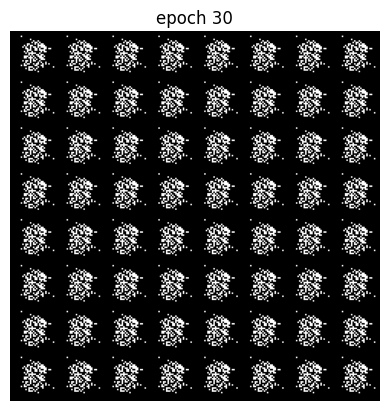

Epoch 30 of 100
Generator loss: 93.64417267, Discriminator loss: 0.00006304


118it [00:08, 13.74it/s]                                                        


Epoch 31 of 100
Generator loss: 93.92615509, Discriminator loss: 0.00005770


118it [00:08, 13.93it/s]                                                        


Epoch 32 of 100
Generator loss: 93.92750549, Discriminator loss: 0.00004798


118it [00:08, 13.98it/s]                                                        


Epoch 33 of 100
Generator loss: 94.22591400, Discriminator loss: 0.00004402


118it [00:08, 13.99it/s]                                                        


Epoch 34 of 100
Generator loss: 94.44195557, Discriminator loss: 0.00003934


118it [00:08, 13.91it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


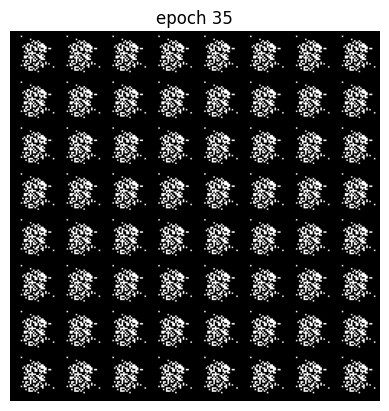

Epoch 35 of 100
Generator loss: 94.20452118, Discriminator loss: 0.00003415


118it [00:08, 13.85it/s]                                                        


Epoch 36 of 100
Generator loss: 94.17496490, Discriminator loss: 0.00003389


118it [00:08, 13.91it/s]                                                        


Epoch 37 of 100
Generator loss: 95.33084106, Discriminator loss: 0.00003220


118it [00:08, 13.88it/s]                                                        


Epoch 38 of 100
Generator loss: 95.59641266, Discriminator loss: 0.00002696


118it [00:08, 13.87it/s]                                                        


Epoch 39 of 100
Generator loss: 95.73156738, Discriminator loss: 0.00002478


118it [00:08, 13.86it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


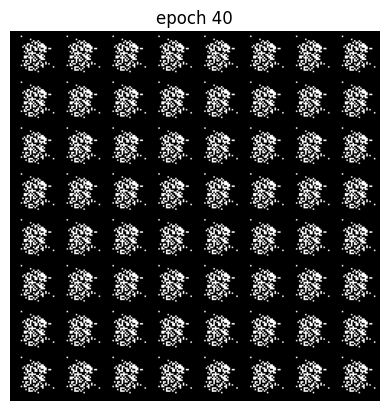

Epoch 40 of 100
Generator loss: 96.11695099, Discriminator loss: 0.00003145


118it [00:08, 13.71it/s]                                                        


Epoch 41 of 100
Generator loss: 97.17913818, Discriminator loss: 0.00002122


118it [00:09, 12.73it/s]                                                        


Epoch 42 of 100
Generator loss: 96.98216248, Discriminator loss: 0.00001926


118it [00:08, 13.87it/s]                                                        


Epoch 43 of 100
Generator loss: 97.07358551, Discriminator loss: 0.00002070


118it [00:08, 13.92it/s]                                                        


Epoch 44 of 100
Generator loss: 97.42028046, Discriminator loss: 0.00001678


118it [00:08, 13.91it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


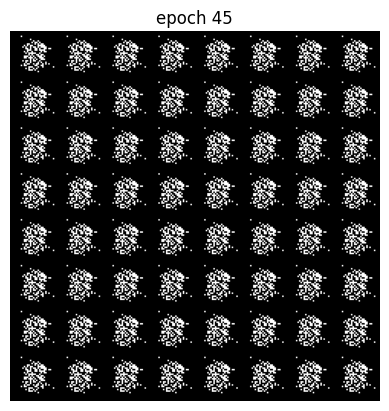

Epoch 45 of 100
Generator loss: 97.23546600, Discriminator loss: 0.00001506


118it [00:08, 13.90it/s]                                                        


Epoch 46 of 100
Generator loss: 97.17330933, Discriminator loss: 0.00001512


118it [00:08, 13.83it/s]                                                        


Epoch 47 of 100
Generator loss: 97.46093750, Discriminator loss: 0.00001339


118it [00:08, 13.96it/s]                                                        


Epoch 48 of 100
Generator loss: 97.72097778, Discriminator loss: 0.00001318


118it [00:08, 13.79it/s]                                                        


Epoch 49 of 100
Generator loss: 97.87888336, Discriminator loss: 0.00001145


118it [00:08, 13.72it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


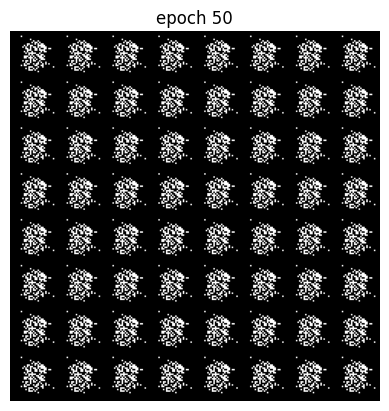

Epoch 50 of 100
Generator loss: 98.18386841, Discriminator loss: 0.00001079


118it [00:08, 13.86it/s]                                                        


Epoch 51 of 100
Generator loss: 98.08327484, Discriminator loss: 0.00000965


118it [00:08, 13.96it/s]                                                        


Epoch 52 of 100
Generator loss: 98.18411255, Discriminator loss: 0.00001025


118it [00:08, 13.87it/s]                                                        


Epoch 53 of 100
Generator loss: 98.77484894, Discriminator loss: 0.00001021


118it [00:08, 13.92it/s]                                                        


Epoch 54 of 100
Generator loss: 98.92337799, Discriminator loss: 0.00000822


118it [00:08, 14.00it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


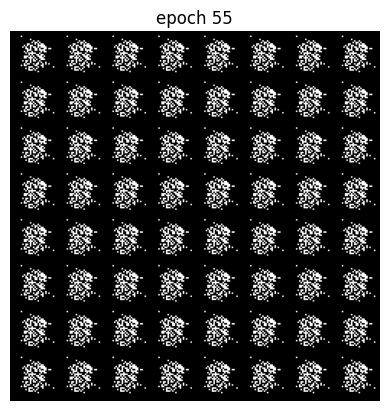

Epoch 55 of 100
Generator loss: 98.95326233, Discriminator loss: 0.00000788


118it [00:08, 13.99it/s]                                                        


Epoch 56 of 100
Generator loss: 99.08422852, Discriminator loss: 0.00000827


118it [00:08, 14.05it/s]                                                        


Epoch 57 of 100
Generator loss: 99.29942322, Discriminator loss: 0.00000664


118it [00:08, 13.88it/s]                                                        


Epoch 58 of 100
Generator loss: 99.10312653, Discriminator loss: 0.00000727


118it [00:08, 14.00it/s]                                                        


Epoch 59 of 100
Generator loss: 99.08091736, Discriminator loss: 0.00000568


118it [00:08, 13.95it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


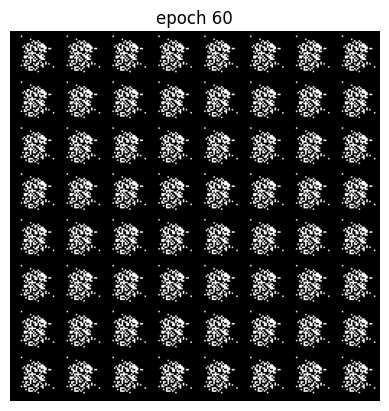

Epoch 60 of 100
Generator loss: 99.20603180, Discriminator loss: 0.00000558


118it [00:08, 13.95it/s]                                                        


Epoch 61 of 100
Generator loss: 99.23500824, Discriminator loss: 0.00000459


118it [00:08, 13.81it/s]                                                        


Epoch 62 of 100
Generator loss: 99.16808319, Discriminator loss: 0.00000418


118it [00:08, 13.98it/s]                                                        


Epoch 63 of 100
Generator loss: 99.31313324, Discriminator loss: 0.00000462


118it [00:08, 13.74it/s]                                                        


Epoch 64 of 100
Generator loss: 99.32543182, Discriminator loss: 0.00000382


118it [00:08, 13.81it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


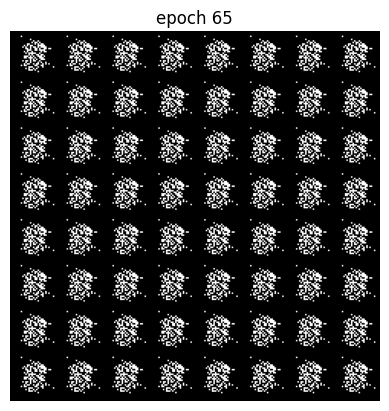

Epoch 65 of 100
Generator loss: 99.31525421, Discriminator loss: 0.00000397


118it [00:08, 14.02it/s]                                                        


Epoch 66 of 100
Generator loss: 99.68785095, Discriminator loss: 0.00000406


118it [00:08, 13.82it/s]                                                        


Epoch 67 of 100
Generator loss: 99.73795319, Discriminator loss: 0.00000320


118it [00:08, 14.10it/s]                                                        


Epoch 68 of 100
Generator loss: 99.78321075, Discriminator loss: 0.00000303


118it [00:08, 14.06it/s]                                                        


Epoch 69 of 100
Generator loss: 99.77120972, Discriminator loss: 0.00000271


118it [00:08, 14.07it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


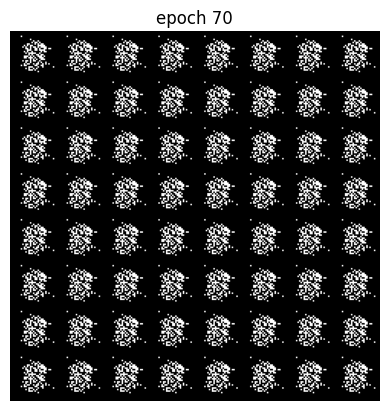

Epoch 70 of 100
Generator loss: 99.79898071, Discriminator loss: 0.00000291


118it [00:08, 14.04it/s]                                                        


Epoch 71 of 100
Generator loss: 99.82714081, Discriminator loss: 0.00000250


118it [00:08, 14.23it/s]                                                        


Epoch 72 of 100
Generator loss: 100.05372620, Discriminator loss: 0.00000352


118it [00:08, 13.90it/s]                                                        


Epoch 73 of 100
Generator loss: 100.30889893, Discriminator loss: 0.00000262


118it [00:08, 14.17it/s]                                                        


Epoch 74 of 100
Generator loss: 100.30274200, Discriminator loss: 0.00000373


118it [00:08, 14.15it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


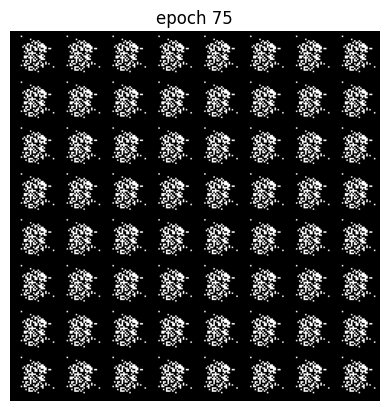

Epoch 75 of 100
Generator loss: 100.62173462, Discriminator loss: 0.00000248


118it [00:08, 14.19it/s]                                                        


Epoch 76 of 100
Generator loss: 100.63492584, Discriminator loss: 0.00000208


118it [00:08, 14.18it/s]                                                        


Epoch 77 of 100
Generator loss: 100.54965973, Discriminator loss: 0.00000192


118it [00:08, 14.21it/s]                                                        


Epoch 78 of 100
Generator loss: 100.52159882, Discriminator loss: 0.00000160


118it [00:08, 14.17it/s]                                                        


Epoch 79 of 100
Generator loss: 100.52347565, Discriminator loss: 0.00000144


118it [00:08, 14.15it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


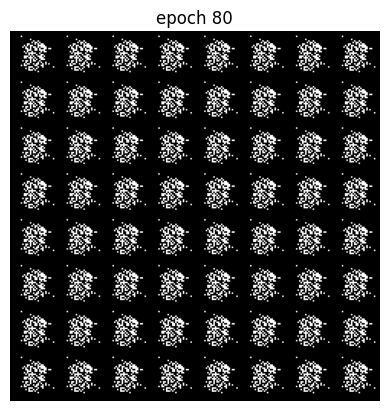

Epoch 80 of 100
Generator loss: 100.40328217, Discriminator loss: 0.00000135


118it [00:08, 14.09it/s]                                                        


Epoch 81 of 100
Generator loss: 100.46814728, Discriminator loss: 0.00000176


118it [00:08, 14.17it/s]                                                        


Epoch 82 of 100
Generator loss: 100.57920074, Discriminator loss: 0.00000144


118it [00:08, 13.75it/s]                                                        


Epoch 83 of 100
Generator loss: 100.58715057, Discriminator loss: 0.00000110


118it [00:08, 14.09it/s]                                                        


Epoch 84 of 100
Generator loss: 100.58426666, Discriminator loss: 0.00000107


118it [00:08, 14.11it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


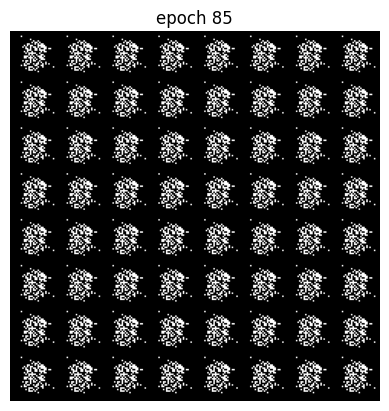

Epoch 85 of 100
Generator loss: 100.48115540, Discriminator loss: 0.00000094


118it [00:08, 14.08it/s]                                                        


Epoch 86 of 100
Generator loss: 100.50669861, Discriminator loss: 0.00000089


118it [00:08, 14.18it/s]                                                        


Epoch 87 of 100
Generator loss: 100.54704285, Discriminator loss: 0.00000085


118it [00:08, 14.17it/s]                                                        


Epoch 88 of 100
Generator loss: 100.55638123, Discriminator loss: 0.00000124


118it [00:08, 14.06it/s]                                                        


Epoch 89 of 100
Generator loss: 100.62968445, Discriminator loss: 0.00000077


118it [00:08, 14.19it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


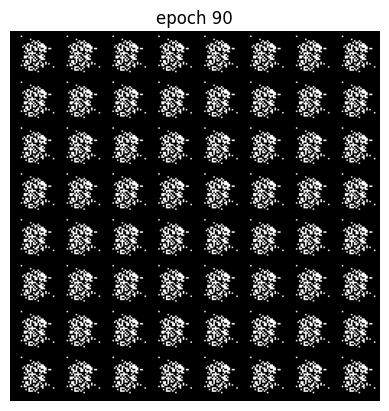

Epoch 90 of 100
Generator loss: 100.65338135, Discriminator loss: 0.00000168


118it [00:08, 14.27it/s]                                                        


Epoch 91 of 100
Generator loss: 100.82656097, Discriminator loss: 0.00000102


118it [00:08, 14.18it/s]                                                        


Epoch 92 of 100
Generator loss: 100.81931305, Discriminator loss: 0.00000080


118it [00:08, 14.08it/s]                                                        


Epoch 93 of 100
Generator loss: 100.79926300, Discriminator loss: 0.00000066


118it [00:08, 14.21it/s]                                                        


Epoch 94 of 100
Generator loss: 100.80192566, Discriminator loss: 0.00000064


118it [00:08, 14.29it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


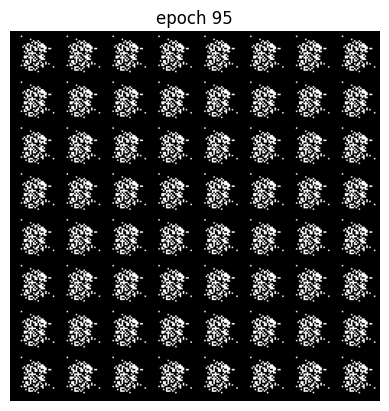

Epoch 95 of 100
Generator loss: 100.78954315, Discriminator loss: 0.00000052


118it [00:08, 14.18it/s]                                                        


Epoch 96 of 100
Generator loss: 100.76453400, Discriminator loss: 0.00000048


118it [00:08, 14.07it/s]                                                        


Epoch 97 of 100
Generator loss: 100.77678680, Discriminator loss: 0.00000179


118it [00:08, 14.19it/s]                                                        


Epoch 98 of 100
Generator loss: 100.85469818, Discriminator loss: 0.00000082


118it [00:08, 14.08it/s]                                                        


Epoch 99 of 100
Generator loss: 100.85184479, Discriminator loss: 0.00000069


118it [00:08, 13.99it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


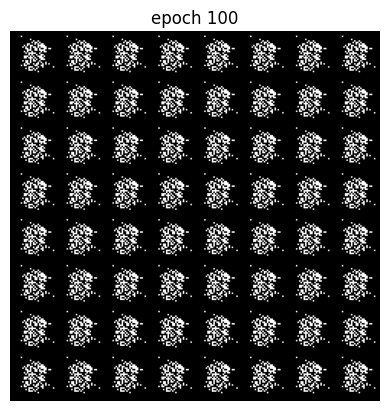

Epoch 100 of 100
Generator loss: 100.85190582, Discriminator loss: 0.00000057


In [14]:
torch.manual_seed(7777)

def generator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    loss = criterion(output, true_label)
    return loss
    
    ######################################
    
def discriminator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    loss = criterion(output, true_label)
    return loss
    
    
    ######################################
    

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ########## 
        
        optim_d.zero_grad()
        
        x, _ = data
        x = x.to(device)
        batch_size = x.size(0)

        z = create_noise(batch_size, nz)
        G_z = generator(z).detach()
    
        D_x = discriminator(x)
        D_G_z = discriminator(G_z)

        real_labels = label_real(batch_size)
        fake_labels = label_fake(batch_size)
        
        loss_d_on_x = discriminator_loss(D_x, real_labels)
        loss_d_on_G_z = discriminator_loss(D_G_z, fake_labels)

        loss_d_on_x_and_G_z = loss_d_on_x + loss_d_on_G_z
        
        loss_d_on_x_and_G_z.backward()
        optim_d.step()
        
        loss_d += loss_d_on_x_and_G_z

        optim_g.zero_grad()

        z = create_noise(batch_size, nz)
        G_z = generator(z)

        D_G_z = discriminator(G_z)

        batch_size = G_z.size(0)
        real_labels = label_real(batch_size)
        fake_labels = label_fake(batch_size)
        
        loss_g_on_G_z = generator_loss(real_labels - D_G_z, fake_labels)
        
        loss_g_on_G_z.backward()
        optim_g.step()
        
        loss_g += loss_g_on_G_z

        # Reference:
        # 1. S.R. Rath, "Generating MNIST Digit Images using Vanilla GAN with PyTorch", Aug 2020
        
        ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/b_gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g.detach().cpu())
    losses_d.append(epoch_loss_d.detach().cpu())
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [15]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/b_generator.pth')

DONE TRAINING


In [16]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/b_generator_images.gif', imgs)

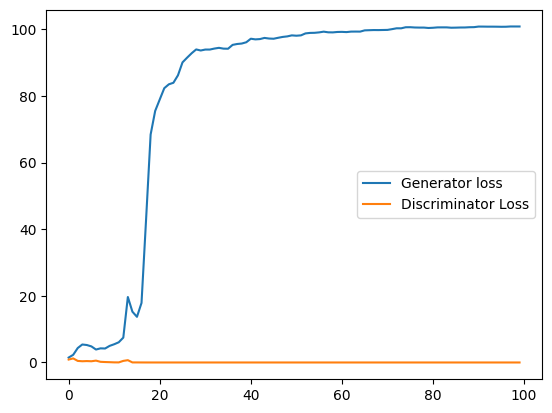

In [17]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/b_loss.png')